## Model: Decision Tree
Attribute Selection: entropy/gini index

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support,accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
import plotly.graph_objects as go
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import  Image

def interpret_confusion_matrix(matrix, title, labels):
    encode, correct, errors, total = [],[],[],[]
    i=0
    for row in matrix:
        total.append(sum(row))
        correct.append(row[i])
        
        consider = row.tolist() 
        del consider[i] #remove correctly classified instances

        errors.append(sum(consider))
        i+=1

    fig = go.Figure(data=[go.Table(columnwidth=5, header=dict(values=["Class","Correctly Classified","Incorrectly Classified","Total"]),cells=dict(values=[labels, correct, errors, total]))])
    fig.update_layout(title= title,width=650,height=400)

    fig.show()

labels = ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]

In [2]:
df = pd.read_csv("Data/DataEncoded.csv")

X=df.iloc[:,:-1]
y=df["NObeyesdad"]

#### Training, Testing

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,stratify=y)

#GIINI
decision_tree_gini=DecisionTreeClassifier(criterion="gini",random_state=42,max_depth=4)
decision_tree_gini.fit(X_train,y_train)
ypred_gini=decision_tree_gini.predict(X_test)

#Entropy
decision_tree_entropy=DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=4)
decision_tree_entropy.fit(X_train,y_train)
ypred_entropy=decision_tree_entropy.predict(X_test)

#### Visualization

In [4]:
gini_features = decision_tree_entropy.feature_names_in_

# plt.figure(figsize=(40,60))
# plt.title("Decision Tree (Measure: Gini)")
# _=tree.plot_tree(decision_tree_gini, feature_names=gini_features, class_names=labels, filled=True) # to not show them in the notebook I assigned returned value to _

dot_data = export_graphviz(decision_tree_gini, out_file=None, feature_names=gini_features, class_names=labels, rounded=True, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
graph.write_png("q2.png")
graph

InvocationException: GraphViz's executables not found

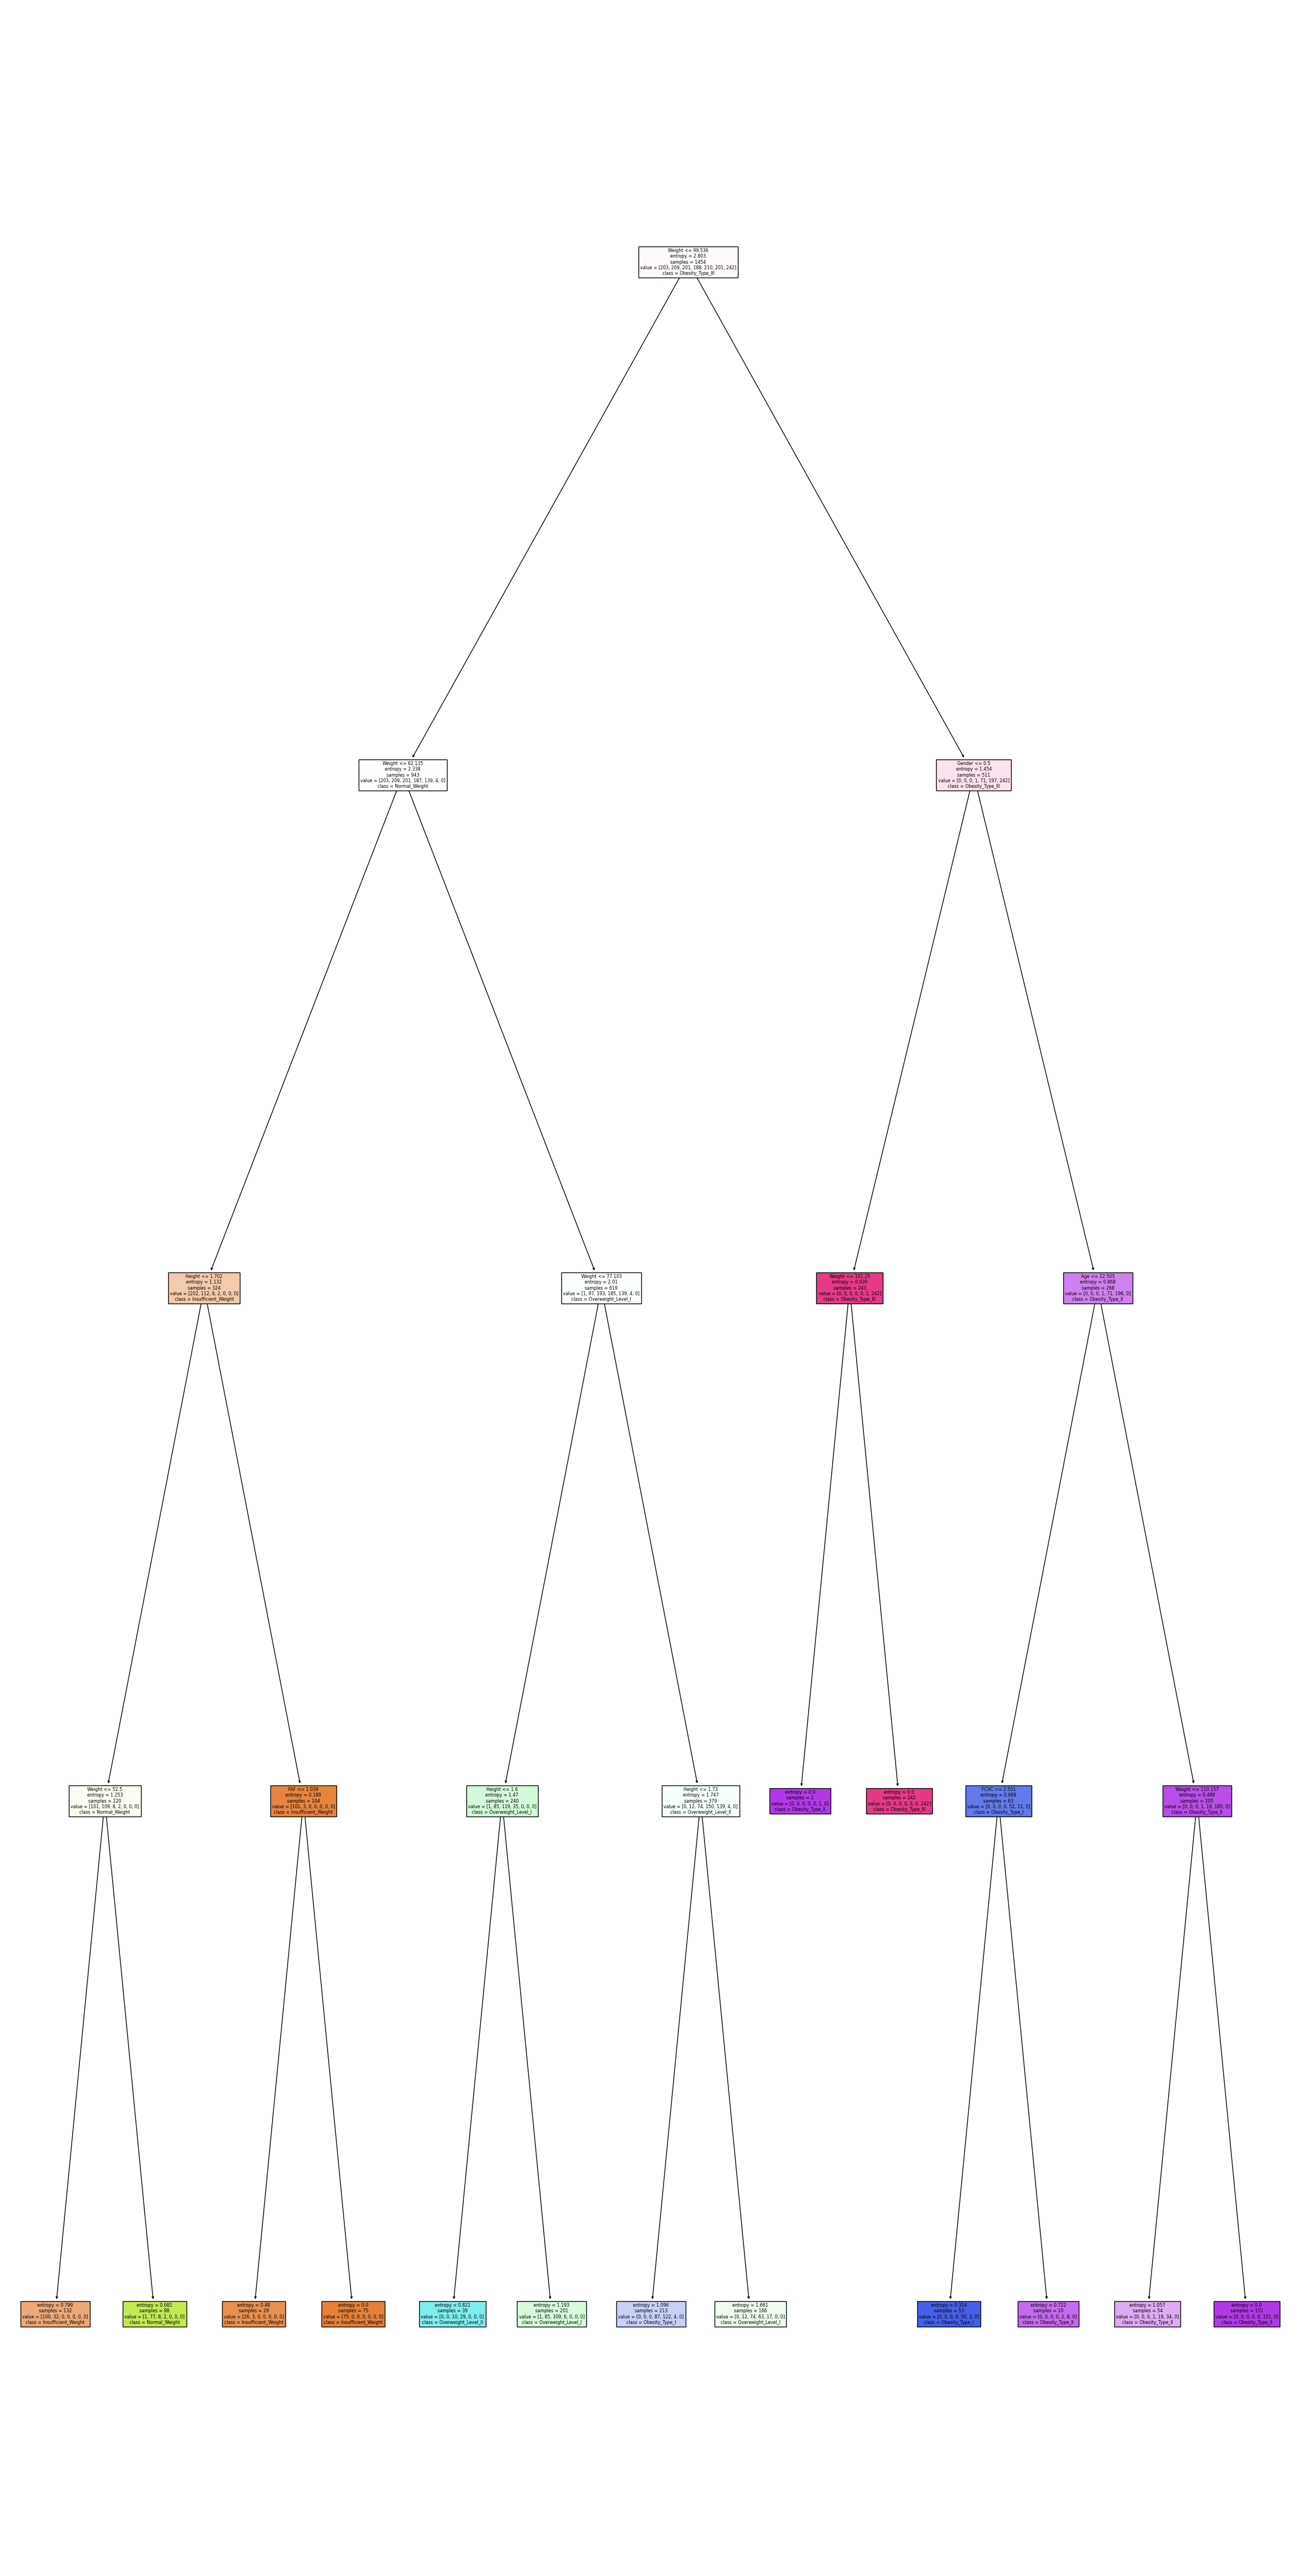

In [ ]:
entropy_features = decision_tree_entropy.feature_names_in_

plt.figure(figsize=(30,60))
plt.title("Decision Tree (Measure: Entropy)")
_=tree.plot_tree(decision_tree_entropy, feature_names=entropy_features, class_names=labels, filled=True) # to not show them in the notebook I assigned returned value to _

#### Evaluation

GINI METRICS -------------------------------------
Cross Validation Score: 0.7723523854511101
Precision Score: 0.7829851816940876
Recall Score: 0.7649484536082474
F1 score: 0.7641363296430508
Accuracy: 0.7649484536082474

Confusion Matrix 
----------------


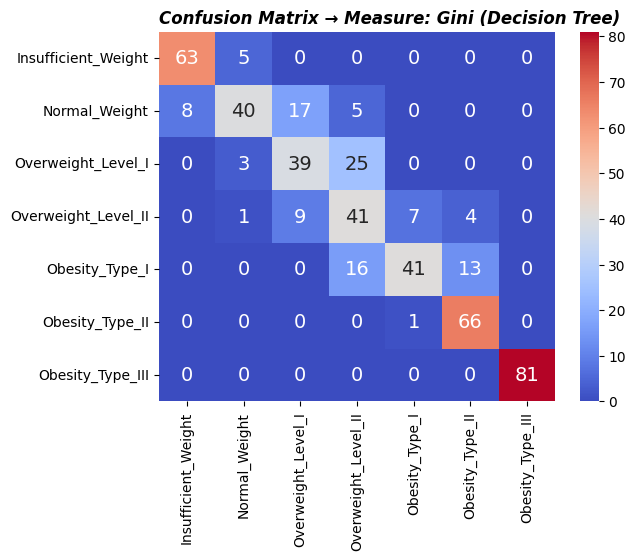



ENTROPY METRICS ---------------------------------
Cross Validation Score: 0.7366225791213983
Precision Score: 0.7604022576916967
Recall Score: 0.7195876288659794
F1 score: 0.6795428201583082
Accuracy: 0.7195876288659794

Confusion Matrix 
----------------


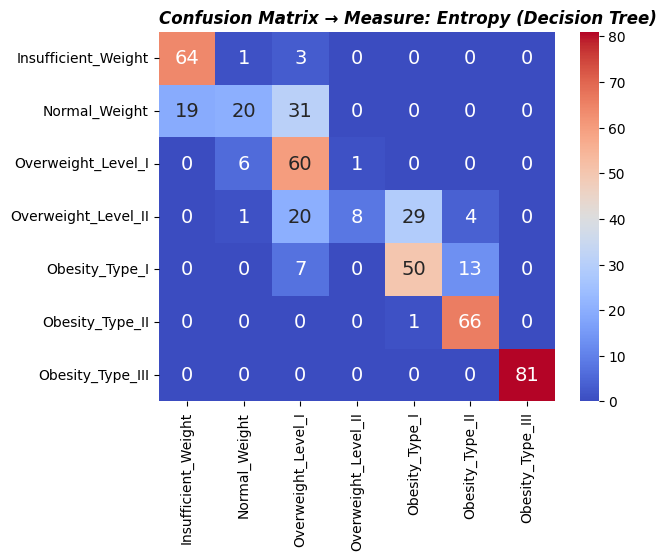

In [ ]:
# GINI metrics
cv_score_gini= np.array(cross_val_score(decision_tree_gini, X_train,y_train, cv=10)).mean()
cf_matrix_gini = confusion_matrix(y_test,ypred_gini)
metrics_gini = precision_recall_fscore_support(y_test,ypred_gini,average="weighted")
precision_gini,recall_gini,f1_gini=metrics_gini[0],metrics_gini[1],metrics_gini[2]
accuracy_gini = accuracy_score(y_test,ypred_gini)

print("GINI METRICS -------------------------------------")
print("Cross Validation Score: {0}\nPrecision Score: {1}\nRecall Score: {2}\nF1 score: {3}\nAccuracy: {4}".format(cv_score_gini,precision_gini,recall_gini,f1_gini,accuracy_gini))

print("\nConfusion Matrix \n----------------")
sns.heatmap(pd.DataFrame(cf_matrix_gini, labels, labels), annot=True, annot_kws={"size": 14},cmap = 'coolwarm',) # font size
plt.title("Confusion Matrix → Measure: Gini (Decision Tree)",loc='left', fontweight='bold',  style='italic')
plt.show()

interpret_confusion_matrix(cf_matrix_gini,"Breakdown of Confusion Matrix → Measure: Gini (Decision Tree)", labels)


# Entropy Metrics
cv_score_entropy= np.array(cross_val_score(decision_tree_entropy,X_train,y_train, cv=10)).mean()
cf_matrix_entropy = confusion_matrix(y_test,ypred_entropy)
metrics_entropy= precision_recall_fscore_support(y_test,ypred_entropy,average="weighted")
precision_entropy,recall_entropy,f1_entropy=metrics_entropy[0],metrics_entropy[1],metrics_entropy[2]
accuracy_entropy = accuracy_score(y_test,ypred_entropy)

print("\n\nENTROPY METRICS ---------------------------------")
print("Cross Validation Score: {0}\nPrecision Score: {1}\nRecall Score: {2}\nF1 score: {3}\nAccuracy: {4}".format(cv_score_entropy,precision_entropy,recall_entropy,f1_entropy,accuracy_entropy))

print("\nConfusion Matrix \n----------------")
sns.heatmap(pd.DataFrame(cf_matrix_entropy, labels, labels), annot=True, annot_kws={"size": 14},cmap = 'coolwarm',) # font size
plt.title("Confusion Matrix → Measure: Entropy (Decision Tree)",loc='left', fontweight='bold',  style='italic')
plt.show()

interpret_confusion_matrix(cf_matrix_entropy, "Breakdown of Confusion Matrix → Measure: Entropy (Decision Tree)", labels)

